In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import time

start=time.time()

#df_green=pd.read_csv("D:/ShaonLab/fish_data/2022.02.24/edited_images/GREENspots_cbx5_HBSS_i27_i28_20220233.csv")
#df_red=pd.read_csv("D:/ShaonLab/fish_data/2022.02.24/edited_images/REDspots_cbx5_HBSS_i27_i28_20220233.csv")

df_green=pd.read_csv('D:/ShaonLab/fish_data/15-10-2021-smFISH-001-i27.csv')
df_red=pd.read_csv('D:/ShaonLab/fish_data/15-10-2021-smFISH-001-i28.csv')

# df_green=pd.read_csv('D:/ShaonLab/fish_data/20220314/edited_images/GREEN_Cbx5_p27_p28_010.csv')
# df_red=pd.read_csv('D:/ShaonLab/fish_data/20220314/edited_images/RED_Cbx5_p27_p28_010.csv')

df_green.head(5)

,x,y,t,c,intensity
0,9.3034,88.4671,1,1,1845.7588
1,27.1941,50.7526,1,1,753.5024
2,46.9555,93.7211,1,1,2379.1614
3,9.7296,98.1537,1,1,1776.4257
4,39.8807,133.7027,1,1,1381.2240


In [4]:

green_pos=df_green[['x','y']].values
red_pos=df_red[['x','y']].values


def distance(loc1, loc2):
    coloc=0
    neighbor=np.zeros(len(loc1))
    for i in range(len(loc1)):
        y1 = loc1[i,1]
        x1 = loc1[i,0]
        count = 0
        for j in range(len(loc2)):
            y2 = loc2[j,1]
            x2 = loc2[j,0]
            if sqrt((y2-y1)**2 + (x2-x1)**2)<=6:
                coloc+=1
                count+=1
        neighbor[i]=count
    return neighbor, coloc;



p=distance(green_pos,red_pos)
#print(p)

err = np.count_nonzero(p[0]>1)

print('no of green spots = ',len(df_green['x']),'no of red spots = ',len(df_red['x']),'no of spots with more than one neighbor = ',err)

ratio_g=p[1]/len(df_green['x'])
ratio_r=p[1]/len(df_red['x'])
print('coloc count=',p[1],'fraction of green coloc=',ratio_g,'fraction of red coloc=',ratio_r)


end=time.time()
print('execution time =', end-start)
        
#neighbor_count=pd.DataFrame(p,columns=['no. of neighbors'])
#neighbor_count.to_csv('neighbor.csv')

no of green spots =  4554 no of red spots =  5088 no of spots with more than one neighbor =  1185
coloc count= 5625 fraction of green coloc= 1.2351778656126482 fraction of red coloc= 1.1055424528301887
execution time = 68.03279542922974


In [5]:
ratio_g=(p[1]-err)/len(df_green['x'])
ratio_r=(p[1]-err)/len(df_red['x'])
print('coloc count=',p[1]-err,'fraction of green coloc=',ratio_g,'fraction of red coloc=',ratio_r)


coloc count= 4440 fraction of green coloc= 0.9749670619235836 fraction of red coloc= 0.8726415094339622


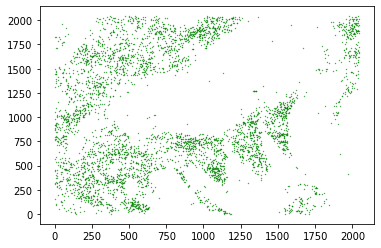

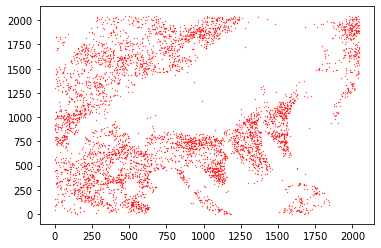

In [6]:

plt.scatter(df_green['x'],df_green['y'], c='g', s=0.1)
plt.figure()
plt.scatter(df_red['x'],df_red['y'], c='r',s=0.1)